In [52]:
import jenkspy as jenkspy
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np

df=pd.read_csv('bank_marketing_training')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


## Learning codes(videos)

In [53]:
cross_tab1= pd.crosstab(df['previous_outcome'],df['response'])
cross_tab1

response,no,yes
previous_outcome,,
failure,2390,385
nonexistent,21176,2034
success,320,569


<AxesSubplot:xlabel='previous_outcome'>

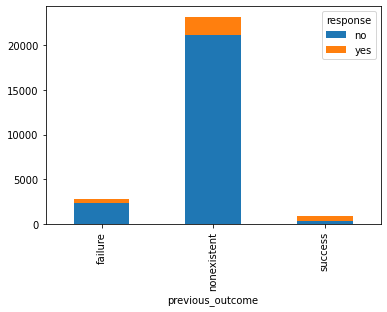

In [54]:
cross_tab1.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='previous_outcome'>

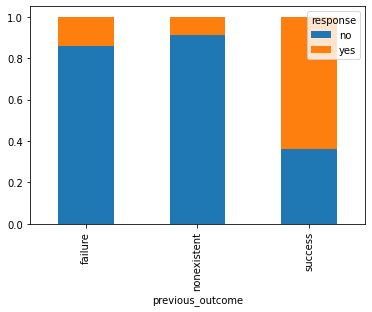

In [55]:
cross_tab1_normal= cross_tab1.div(cross_tab1.sum(1),axis=0)
cross_tab1_normal.plot(kind='bar',stacked=True)

In [56]:
cross_tab2= pd.crosstab(df['response'],df['previous_outcome'])
cross_tab2

previous_outcome,failure,nonexistent,success
response,,,
no,2390,21176,320
yes,385,2034,569


In [57]:
round(cross_tab2.div(cross_tab2.sum(0),axis=1) * 100, 1)

previous_outcome,failure,nonexistent,success
response,,,
no,86.1,91.2,36.0
yes,13.9,8.8,64.0


In [58]:
age_yes= df[df.response=="yes"]['age']
age_no= df[df.response=="no"]['age']

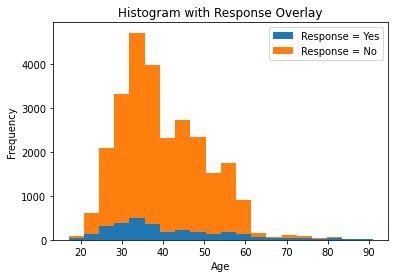

In [59]:
plt.hist([age_yes,age_no],bins=20,stacked=True)
plt.legend(['Response = Yes','Response = No'])
plt.title('Histogram with Response Overlay')
plt.xlabel('Age'); plt.ylabel('Frequency');plt.show()




In [60]:
df['aged_binned'] = pd.cut(x=df['age'],bins=[0,27,60.01,100],labels=["under 27","27 to 60"," more than 60"])

<AxesSubplot:title={'center':'binned graph with response overlay'}, xlabel='aged_binned'>

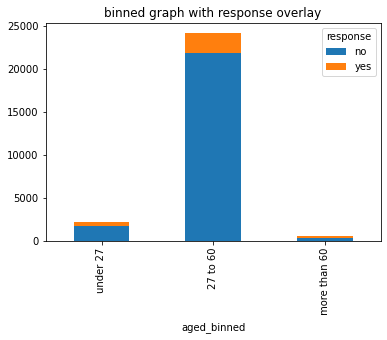

In [61]:
cross_tab4= pd.crosstab(df['aged_binned'],df['response'])
cross_tab4.plot(kind='bar',stacked=True,title='binned graph with response overlay')


## class codes

In [62]:
breaks=jenkspy.jenks_breaks(df['age'], nb_class=3)
print(breaks)

[17.0, 36.0, 48.0, 91.0]


<AxesSubplot:xlabel='aged_bin jenkspy'>

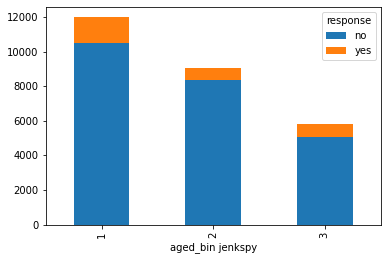

In [63]:
df['aged_bin jenkspy']=pd.cut(df['age'],bins=breaks,labels=["1","2","3"])
cross_tab5=pd.crosstab(df['aged_bin jenkspy'],df['response'])
cross_tab5.plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='aged_bin jenkspy'>

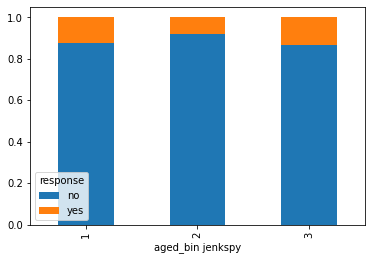

In [64]:
cross_tab6=cross_tab5.div(cross_tab5.sum(1),axis=0)
cross_tab6.plot(kind='bar',stacked=True)

In [65]:
breaks2=jenkspy.jenks_breaks(df['age'], nb_class=4)
print(breaks2)

[17.0, 33.0, 42.0, 53.0, 91.0]


In [68]:
df['age'].corr(df["response"])



TypeError: unsupported operand type(s) for /: 'str' and 'int'